<font color="#CC3D3D"><p>
# ***다변량 Team Project***

- **`PROBLEM`**: 서울시 대기오염의 주범을 찾아라!!
- **`INPUT`**: 최근 3년 서울시 대기오염 데이터(`daegi_20, 21, 22`)
- **`OUTPUT`**: 위 데이터를 이용하여 대기오염이 심한 지역군집별 해결책 제안

* [1. Read Data](#1.-Read-Data)
* [2. Data Cleansing & Feature Engineering](#2.-Data-Cleansing-&-Feature-Engineering)
* [3. Analysis](#3.-Analysis)
* [4. Final Analysis and Troubleshooting](#4.-Final-Analysis-and-Troubleshooting)

##### Imports

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import date, time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

import matplotlib
import platform
from matplotlib import font_manager, rc

# ***1. Read Data***

**서울시 일별 평균 대기오염도 정보(최근 3년 데이터)**  
출처 : 서울열린데이터광장 (https://data.seoul.go.kr/dataList/OA-2218/S/1/datasetView.do#AXexec)

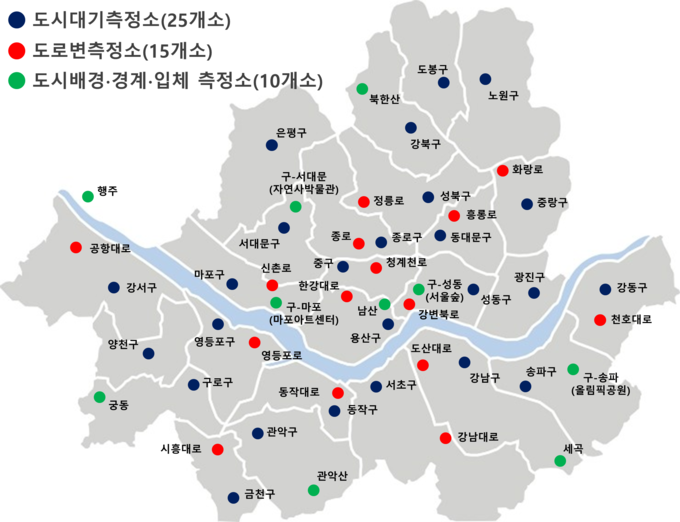

출처 : https://opengov.seoul.go.kr/mediahub/16867197

In [2]:
daegi_20 = pd.read_csv(os.path.abspath("../프로젝트/Data")+"/일별평균대기오염도_2020.csv" , encoding = 'cp949')
daegi_21 = pd.read_csv(os.path.abspath("../프로젝트/Data")+"/일별평균대기오염도_2021.csv" , encoding = 'cp949')
daegi_22 = pd.read_csv(os.path.abspath("../프로젝트/Data")+"/일별평균대기오염도_2022.csv" , encoding = 'cp949')

In [3]:
daegi_20

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,강남대로,0.036,0.003,1.1,0.004,36.0,20.0
2,20200101,강동구,0.036,0.004,0.6,0.003,37.0,28.0
3,20200101,강변북로,0.042,0.003,0.8,0.004,40.0,26.0
4,20200101,강북구,0.045,0.004,0.7,0.003,41.0,27.0
...,...,...,...,...,...,...,...,...
18295,20201231,청계천로,0.020,0.019,0.5,0.003,25.0,15.0
18296,20201231,한강대로,0.026,0.017,0.5,0.003,29.0,11.0
18297,20201231,행주,0.013,0.026,0.6,0.003,24.0,11.0
18298,20201231,홍릉로,0.027,0.014,0.5,0.004,5.0,3.0


# ***2. Data Cleansing & Feature Engineering***

In [5]:
daegi_data = pd.concat([daegi_20, daegi_21, daegi_22], axis=0).sort_values(by="측정일시").reset_index(drop=True)

## ***Data Cleansing***

### ***대기Data 전처리***

In [6]:
daegi_data.head(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0,NaN,NaN,NaN
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0,NaN,NaN,NaN
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0,NaN,NaN,NaN


In [7]:
# 2020,2021 아황산가스농도(ppm) -> 2022 아황산가스(ppm)붙이기
# 2020,2021 미세먼지농도(㎍/㎥) -> 2022 미세먼지(㎍/㎥)붙이기
# 2020,2021 초미세먼지농도(㎍/㎥) -> 2022 초미세먼지(㎍/㎥)붙이기

daegi_data['아황산가스농도(ppm)'] = daegi_data['아황산가스농도(ppm)'].fillna(daegi_data['아황산가스(ppm)'])
daegi_data['미세먼지농도(㎍/㎥)'] = daegi_data['미세먼지농도(㎍/㎥)'].fillna(daegi_data['미세먼지(㎍/㎥)'])
daegi_data['초미세먼지농도(㎍/㎥)'] = daegi_data['초미세먼지농도(㎍/㎥)'].fillna(daegi_data['초미세먼지(㎍/㎥)'])
daegi_data = daegi_data.iloc[:,:-3]
daegi_data

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0
3,20200101,송파구,0.037,0.003,0.7,0.003,32.0,22.0
4,20200101,시흥대로,0.044,0.003,0.7,0.004,33.0,24.0
...,...,...,...,...,...,...,...,...
51745,20221031,송파구,0.030,0.019,0.4,0.003,26.0,14.0
51746,20221031,세곡,0.029,0.008,1.0,0.003,26.0,12.0
51747,20221031,성북구,0.029,0.022,0.5,0.002,24.0,14.0
51748,20221031,정릉로,0.034,0.015,0.5,0.003,27.0,14.0


In [8]:
daegi_data.isnull().sum()

측정일시              0
측정소명              0
이산화질소농도(ppm)    752
오존농도(ppm)       586
일산화탄소농도(ppm)    783
아황산가스농도(ppm)    655
미세먼지농도(㎍/㎥)     896
초미세먼지농도(㎍/㎥)    876
dtype: int64

### ***결측치 처리***

In [9]:
daegi_data.측정소명.unique()

array(['강남구', '성북구', '세곡', '송파구', '시흥대로', '신촌로', '양천구', '영등포구', '영등포로',
       '올림픽공원', '용산구', '성동구', '자연사박물관', '종로', '종로구', '중구', '중랑구', '천호대로',
       '청계천로', '한강대로', '행주', '홍릉로', '화랑로', '정릉로', '서초구', '은평구', '서대문구',
       '서울숲', '강남대로', '강동구', '강변북로', '강북구', '강서구', '공항대로', '관악산', '광진구',
       '구로구', '궁동', '관악구', '마포아트센터', '남산', '노원구', '도봉구', '도산대로', '동대문구',
       '동작구', '동작대로', '마포구', '금천구', '북한산', '항동'], dtype=object)

In [10]:
# 이전 값으로 결측치 채우기 (반복문으로 측정소별 변수 생성)
daegi_list = []
for i in daegi_data.측정소명.unique():
    globals()[f"dae_{i}"] = daegi_data.query('측정소명==@i').fillna(method='ffill').fillna(method='bfill')
    daegi_list.append(f'dae_{i}') # 대기변수명 리스트

In [11]:
# 합쳐줄 데이터
daegi_data2 = dae_강남구.copy()

In [12]:
for i in daegi_list[1:]:
    daegi_data2 = pd.concat([daegi_data2,eval(i)], axis=0).sort_index()

In [13]:
daegi_data2.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0
3,20200101,송파구,0.037,0.003,0.7,0.003,32.0,22.0
4,20200101,시흥대로,0.044,0.003,0.7,0.004,33.0,24.0


In [14]:
daegi_data2.isnull().sum()

측정일시            0
측정소명            0
이산화질소농도(ppm)    0
오존농도(ppm)       0
일산화탄소농도(ppm)    0
아황산가스농도(ppm)    0
미세먼지농도(㎍/㎥)     0
초미세먼지농도(㎍/㎥)    0
dtype: int64

In [15]:
daegi_data2.to_csv('대기환경데이터.csv', index=False)

## ***Feature Engineering***

In [16]:
data = pd.read_csv("./대기환경데이터.csv" , encoding = 'UTF-8')

In [17]:
data.head(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0


In [18]:
# Data 년, 월, 일 생성

data['year'] = data['측정일시'].apply(lambda x: int(str(x)[:4]))
data['month'] = data['측정일시'].apply(lambda x: int(str(x)[4:6]))
data['day'] = data['측정일시'].apply(lambda x: int(str(x)[6:]))
data['datetime'] = data['측정일시'].apply(lambda x: (str(x)))
data['datetime'] = pd.to_datetime(data['datetime'], format = '%Y%m%d')

In [19]:
# 계절
data["season"] = data['month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

In [20]:
# 상하반기

data['상하반기'] = data['month'].apply(lambda x : '상반기' if x in [1,2,3,4,5,6] else '하반기')

In [21]:
# 요일

def get_weekday(x):
    days = ['월','화', '수', '목', '금', '토', '일']
    return days[date.weekday(x)]

data['요일'] = data['datetime'].apply(lambda x: get_weekday(x))

In [22]:
data.head(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),year,month,day,datetime,season,상하반기,요일
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0,2020,1,1,2020-01-01,WINTER,상반기,수
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0,2020,1,1,2020-01-01,WINTER,상반기,수
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0,2020,1,1,2020-01-01,WINTER,상반기,수


## ***Feature Making***

In [23]:
tr = data.copy()

In [24]:
features = []

In [25]:
# 측정소별 년도별 대기오염도 평균

for k in data.columns[2:8]:
    lst = ['측정소명']
    t = pd.pivot_table(tr, index='측정소명', columns='year', values=str(k), 
                   aggfunc=np.mean).fillna(0).astype(float).reset_index()
    # 컬럼명 변경
    for i in range(1, 4):
        lst.append(str(t.columns[i]) +'년_'+ str(k))
    t.columns = lst
    
    features.append(t)
    
display(t)

,측정소명,2020년_초미세먼지농도(㎍/㎥),2021년_초미세먼지농도(㎍/㎥),2022년_초미세먼지농도(㎍/㎥)
0,강남구,20.885246,20.021918,17.167763
1,강남대로,18.825137,19.380822,18.523026
2,강동구,22.948087,20.767123,17.891447
3,강변북로,19.767760,21.024658,18.240132
4,강북구,21.371585,18.991781,18.151316
5,강서구,20.811475,20.926027,17.809211
6,공항대로,19.300546,20.372603,18.888158
7,관악구,19.153005,18.465753,17.641447
8,관악산,15.622951,15.876712,16.131579
9,광진구,19.748634,19.501370,17.674342


In [26]:
# 측정소별 월별 대기오염도 평균

for k in data.columns[2:8]:
    lst = ['측정소명']
    t = pd.pivot_table(tr, index='측정소명', columns='month', values=str(k), 
                   aggfunc=np.mean).fillna(0).astype(float).reset_index()
    # 컬럼명 변경
    for i in range(1, 13):
        lst.append(str(t.columns[i]) +'월_'+ str(k))
    t.columns = lst
    
    features.append(t)
    
display(t)

,측정소명,1월_초미세먼지농도(㎍/㎥),2월_초미세먼지농도(㎍/㎥),3월_초미세먼지농도(㎍/㎥),4월_초미세먼지농도(㎍/㎥),5월_초미세먼지농도(㎍/㎥),6월_초미세먼지농도(㎍/㎥),7월_초미세먼지농도(㎍/㎥),8월_초미세먼지농도(㎍/㎥),9월_초미세먼지농도(㎍/㎥),10월_초미세먼지농도(㎍/㎥),11월_초미세먼지농도(㎍/㎥),12월_초미세먼지농도(㎍/㎥)
0,강남구,25.268817,26.764706,26.322581,20.566667,17.870968,18.188889,15.559140,14.440860,10.144444,14.462366,23.450000,24.080645
1,강남대로,25.741935,27.435294,27.182796,19.666667,19.118280,15.211111,11.688172,9.473118,9.566667,15.849462,25.500000,25.661290
2,강동구,30.279570,29.917647,27.483871,21.044444,18.182796,18.266667,15.000000,13.505376,9.711111,15.634409,26.383333,27.612903
3,강변북로,27.215054,28.588235,27.956989,20.366667,18.731183,16.111111,13.225806,10.989247,8.711111,15.387097,28.066667,27.693548
4,강북구,27.365591,28.411765,26.129032,20.277778,17.731183,18.166667,15.752688,13.387097,9.388889,13.903226,23.433333,24.500000
5,강서구,25.989247,27.411765,26.451613,20.422222,18.935484,18.555556,16.612903,14.064516,10.455556,14.978495,25.466667,23.838710
6,공항대로,27.430108,27.905882,25.967742,20.033333,18.795699,18.388889,16.236559,13.741935,10.533333,13.645161,19.316667,24.741935
7,관악구,23.741935,25.376471,23.741935,19.055556,17.645161,17.166667,15.408602,13.150538,9.488889,14.720430,22.850000,22.403226
8,관악산,19.064516,20.105882,21.258065,18.722222,17.483871,16.144444,13.193548,9.279570,7.555556,12.688172,19.216667,17.596774
9,광진구,24.440860,27.035294,25.559140,19.888889,18.354839,17.222222,14.430108,13.462366,8.688889,13.870968,24.966667,25.161290


In [27]:
# 측정소별 요일별 대기오염도 평균

for k in data.columns[2:8]:
    lst = ['측정소명']
    t = pd.pivot_table(tr, index='측정소명', columns='요일', values=str(k), 
                   aggfunc=np.mean).fillna(0).astype(float).reset_index()
    # 컬럼명 변경
    for i in range(1, 8):
        lst.append(str(t.columns[i]) +'_'+ str(k))
    t.columns = lst
    
    features.append(t)
    
display(t)

,측정소명,금_초미세먼지농도(㎍/㎥),목_초미세먼지농도(㎍/㎥),수_초미세먼지농도(㎍/㎥),월_초미세먼지농도(㎍/㎥),일_초미세먼지농도(㎍/㎥),토_초미세먼지농도(㎍/㎥),화_초미세먼지농도(㎍/㎥)
0,강남구,21.087838,19.851351,18.851351,18.074324,19.898649,20.824324,17.823129
1,강남대로,21.006757,18.986486,17.925676,17.837838,18.750000,20.500000,17.510204
2,강동구,22.283784,21.094595,19.979730,19.331081,21.385135,21.831081,18.938776
3,강변북로,21.472973,20.182432,19.040541,18.391892,19.804054,21.108108,18.326531
4,강북구,21.094595,19.952703,18.871622,18.182432,20.344595,20.702703,17.945578
5,강서구,22.067568,20.162162,19.027027,18.385135,20.337838,21.513514,18.285714
6,공항대로,21.324324,20.020270,18.952703,18.331081,19.500000,21.013514,17.748299
7,관악구,20.250000,18.452703,17.547297,16.979730,18.979730,20.283784,16.761905
8,관악산,18.074324,16.101351,15.425676,14.837838,15.337838,17.121622,14.122449
9,광진구,20.445946,19.270270,18.222973,17.797297,19.891892,20.364865,17.360544


In [28]:
# 측정소별 계절 대기오염도 평균

for k in data.columns[2:8]:
    lst = ['측정소명']
    t = pd.pivot_table(tr, index='측정소명', columns='season', values=str(k), 
                   aggfunc=np.mean).fillna(0).astype(float).reset_index()
    # 컬럼명 변경
    for i in range(1, 5):
        lst.append(t.columns[i] +'_'+ str(k))
    t.columns = lst
    
    features.append(t)

display(t)

,측정소명,FALL_초미세먼지농도(㎍/㎥),SPRING_초미세먼지농도(㎍/㎥),SUMMER_초미세먼지농도(㎍/㎥),WINTER_초미세먼지농도(㎍/㎥)
0,강남구,15.082305,21.597826,16.039855,25.491667
1,강남대로,15.905350,22.014493,12.090580,26.320833
2,강동구,16.094650,22.250000,15.561594,29.462500
3,강변북로,16.045267,22.373188,13.413043,27.825000
4,강북구,14.584362,21.391304,15.742754,26.995833
5,강서구,15.893004,21.952899,16.387681,25.937500
6,공항대로,13.893004,21.615942,16.097826,26.904167
7,관악구,14.790123,20.159420,15.221014,23.975000
8,관악산,12.399177,19.159420,12.836957,19.054167
9,광진구,14.691358,21.282609,15.014493,25.545833


In [29]:
# 측정소별 상하반기 대기오염도 평균

for k in data.columns[2:8]:
    lst = ['측정소명']
    t = pd.pivot_table(tr, index='측정소명', columns='상하반기', values=str(k), 
                   aggfunc=np.mean).fillna(0).astype(float).reset_index()
    # 컬럼명 변경
    for i in range(1, 3):
        lst.append(t.columns[i] +'_'+ str(k))
    t.columns = lst
    
    features.append(t)

display(t)

,측정소명,상반기_초미세먼지농도(㎍/㎥),하반기_초미세먼지농도(㎍/㎥)
0,강남구,22.468750,16.187373
1,강남대로,22.373162,15.120163
2,강동구,24.161765,16.851324
3,강변북로,23.136029,16.024440
4,강북구,22.976103,15.830957
5,강서구,22.933824,16.686354
6,공항대로,23.058824,15.678208
7,관악구,21.091912,15.558045
8,관악산,18.792279,12.615071
9,광진구,22.049632,15.731161


In [30]:
분석_data = pd.DataFrame(features[0]['측정소명'])

In [31]:
idx_data = 분석_data.copy()

In [32]:
for f in features :
    분석_data = pd.merge(분석_data, f, how='left',on='측정소명')
display(분석_data.shape)

(51, 169)

In [34]:
분석_data.head()

,측정소명,2020년_이산화질소농도(ppm),2021년_이산화질소농도(ppm),2022년_이산화질소농도(ppm),2020년_오존농도(ppm),2021년_오존농도(ppm),2022년_오존농도(ppm),2020년_일산화탄소농도(ppm),2021년_일산화탄소농도(ppm),2022년_일산화탄소농도(ppm),...,상반기_오존농도(ppm),하반기_오존농도(ppm),상반기_일산화탄소농도(ppm),하반기_일산화탄소농도(ppm),상반기_아황산가스농도(ppm),하반기_아황산가스농도(ppm),상반기_미세먼지농도(㎍/㎥),하반기_미세먼지농도(㎍/㎥),상반기_초미세먼지농도(㎍/㎥),하반기_초미세먼지농도(㎍/㎥)
0,강남구,0.025456,0.023997,0.021138,0.025423,0.027077,0.033454,0.491803,0.449315,0.385197,...,0.030849,0.025613,0.479228,0.408147,0.003208,0.003126,39.459559,26.460285,22.468750,16.187373
1,강남대로,0.033691,0.031915,0.030441,0.017732,0.019964,0.022549,0.703279,0.703562,0.619408,...,0.022381,0.017224,0.683824,0.673116,0.003050,0.003151,46.139706,28.441955,22.373162,15.120163
2,강동구,0.024727,0.022315,0.018220,0.022232,0.024619,0.027214,0.457377,0.410959,0.358224,...,0.027474,0.021283,0.438603,0.382281,0.002717,0.002544,43.588235,28.126273,24.161765,16.851324
3,강변북로,0.033719,0.030652,0.031352,0.019929,0.021427,0.021967,0.624863,0.552877,0.543421,...,0.023068,0.018827,0.606801,0.540937,0.003305,0.003159,46.110294,28.024440,23.136029,16.024440
4,강북구,0.019697,0.016211,0.013437,0.024068,0.028619,0.034289,0.448907,0.399178,0.388158,...,0.030954,0.026151,0.439154,0.385132,0.002550,0.002507,43.884191,29.741344,22.976103,15.830957


# ***3. Analysis***

* [3.1. 군집분석](#3.1.-군집분석)
* [3.2. PCA](#3.2.-PCA)
* [3.3. 요인분석](#3.3.-요인분석)

## ***3.1. 군집분석***

In [35]:
분석_data.set_index(분석_data.측정소명, inplace=True)
분석_data.drop(columns='측정소명',inplace=True)

In [36]:
분석_data.head(3)

,2020년_이산화질소농도(ppm),2021년_이산화질소농도(ppm),2022년_이산화질소농도(ppm),2020년_오존농도(ppm),2021년_오존농도(ppm),2022년_오존농도(ppm),2020년_일산화탄소농도(ppm),2021년_일산화탄소농도(ppm),2022년_일산화탄소농도(ppm),2020년_아황산가스농도(ppm),...,상반기_오존농도(ppm),하반기_오존농도(ppm),상반기_일산화탄소농도(ppm),하반기_일산화탄소농도(ppm),상반기_아황산가스농도(ppm),하반기_아황산가스농도(ppm),상반기_미세먼지농도(㎍/㎥),하반기_미세먼지농도(㎍/㎥),상반기_초미세먼지농도(㎍/㎥),하반기_초미세먼지농도(㎍/㎥)
측정소명,,,,,,,,,,,,,,,,,,,,,
강남구,0.025456,0.023997,0.021138,0.025423,0.027077,0.033454,0.491803,0.449315,0.385197,0.002915,...,0.030849,0.025613,0.479228,0.408147,0.003208,0.003126,39.459559,26.460285,22.468750,16.187373
강남대로,0.033691,0.031915,0.030441,0.017732,0.019964,0.022549,0.703279,0.703562,0.619408,0.003273,...,0.022381,0.017224,0.683824,0.673116,0.003050,0.003151,46.139706,28.441955,22.373162,15.120163
강동구,0.024727,0.022315,0.018220,0.022232,0.024619,0.027214,0.457377,0.410959,0.358224,0.002828,...,0.027474,0.021283,0.438603,0.382281,0.002717,0.002544,43.588235,28.126273,24.161765,16.851324


In [37]:
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

%matplotlib inline

#### Single

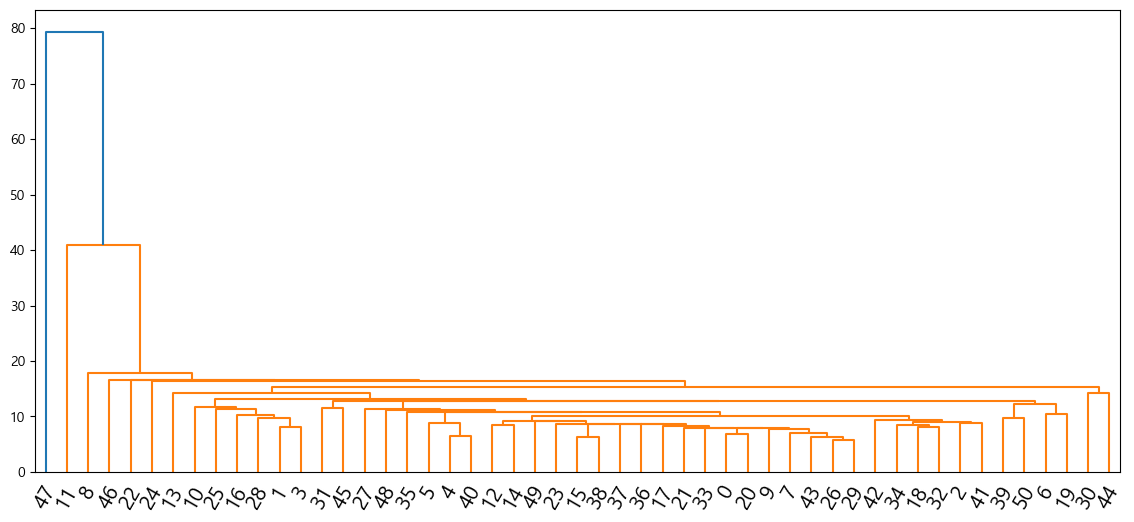

In [38]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

plt.figure(figsize=(14,6))
clust_single = linkage(분석_data, method='single')

dendrogram(clust_single)
plt.xticks(rotation=60, fontsize=15)
plt.show()

#### Complete

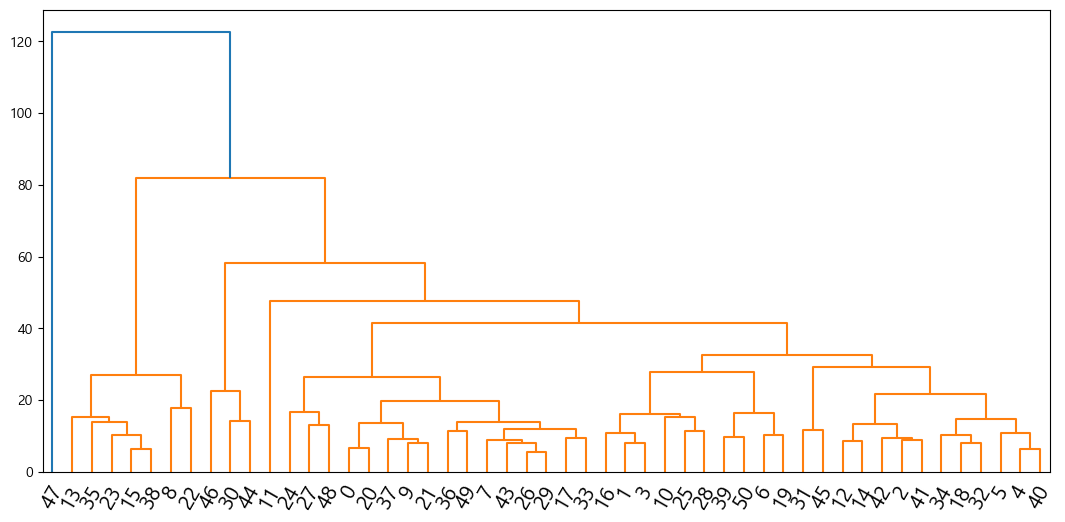

In [39]:
clust_complete = linkage(분석_data, method='complete')

plt.figure(figsize=(13,6))
dendrogram(clust_complete)
plt.xticks(rotation=60, fontsize=15)
plt.show()

#### Average

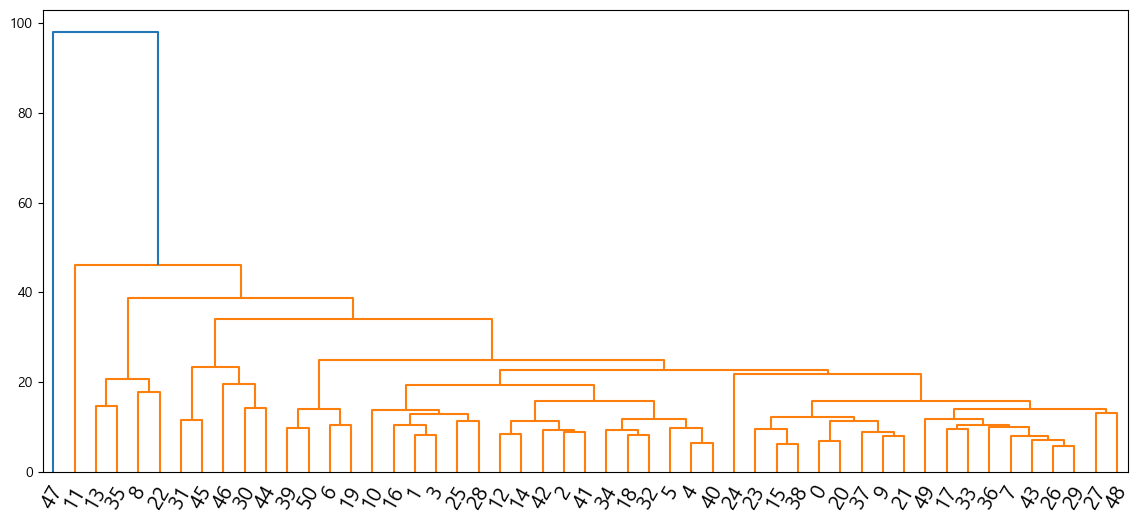

In [40]:
clust_avg = linkage(분석_data, method='average')

plt.figure(figsize=(14,6))
dendrogram(clust_avg)
plt.xticks(rotation=60, fontsize=15)
plt.show()

#### Ward

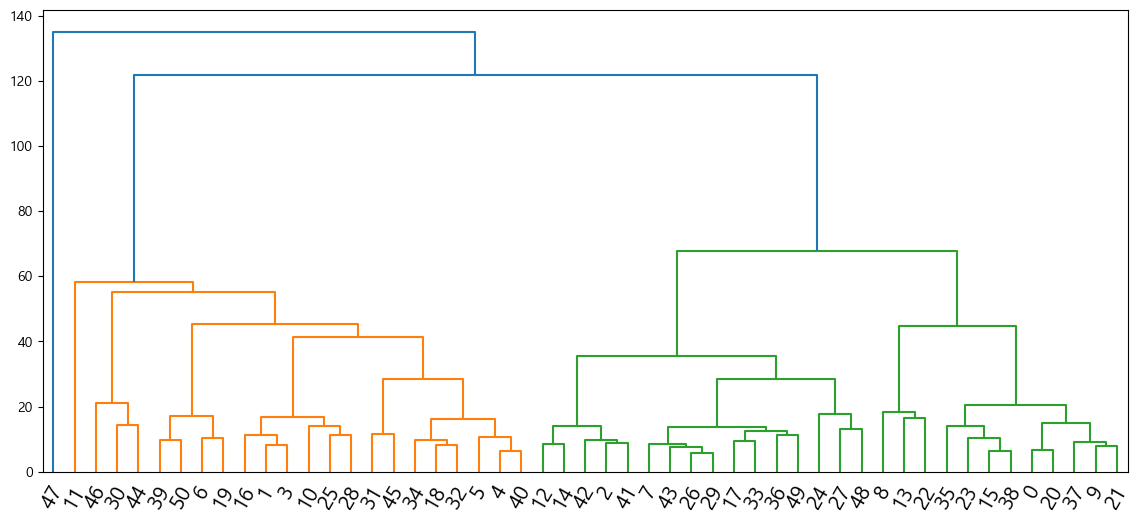

In [41]:
clust_ward = linkage(분석_data, method='ward')

plt.figure(figsize=(14,6))
dendrogram(clust_ward)
plt.xticks(rotation=60, fontsize=15)
plt.show()

군집화가 잘 진행되지 않음. 이상치 제거 필요해 보임.

47번 인덱스 항동 제거전 Linkage Method
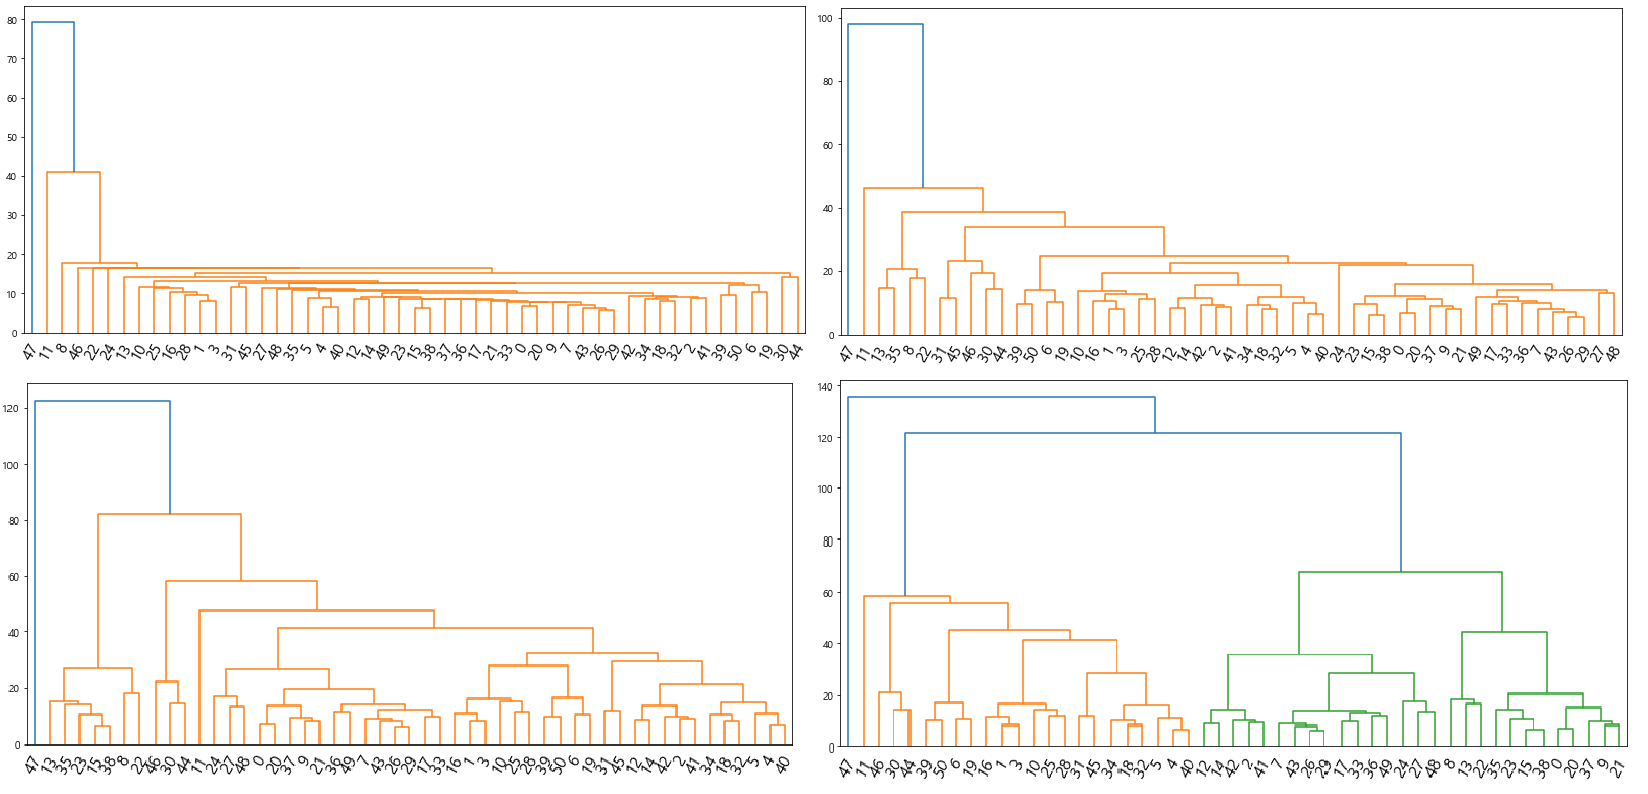

47번 인덱스 항동을 제거하고 11번 인덱스 궁동 제거전 Linkage Method
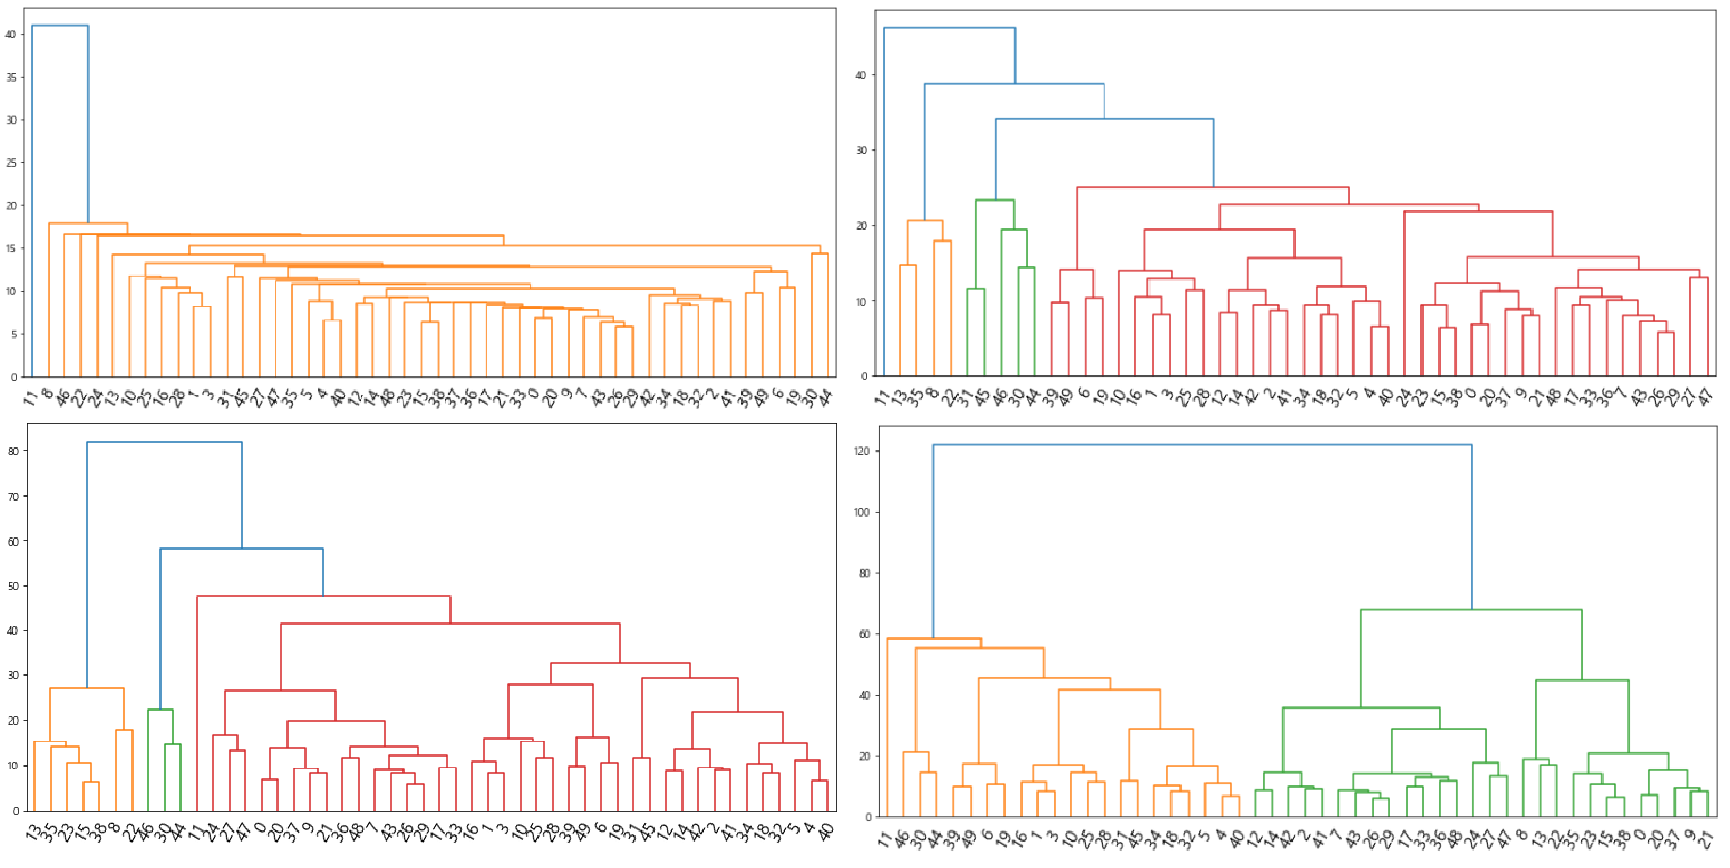

***47, 11번 인덱스 항동, 궁동 제외하고 진행하겠음.***

In [44]:
분석_data.iloc[47].name

'항동'

In [45]:
분석_data.iloc[11].name

'궁동'

In [46]:
분석_data = 분석_data.drop(index = '항동')
분석_data = 분석_data.drop(index = '궁동')

#### Single

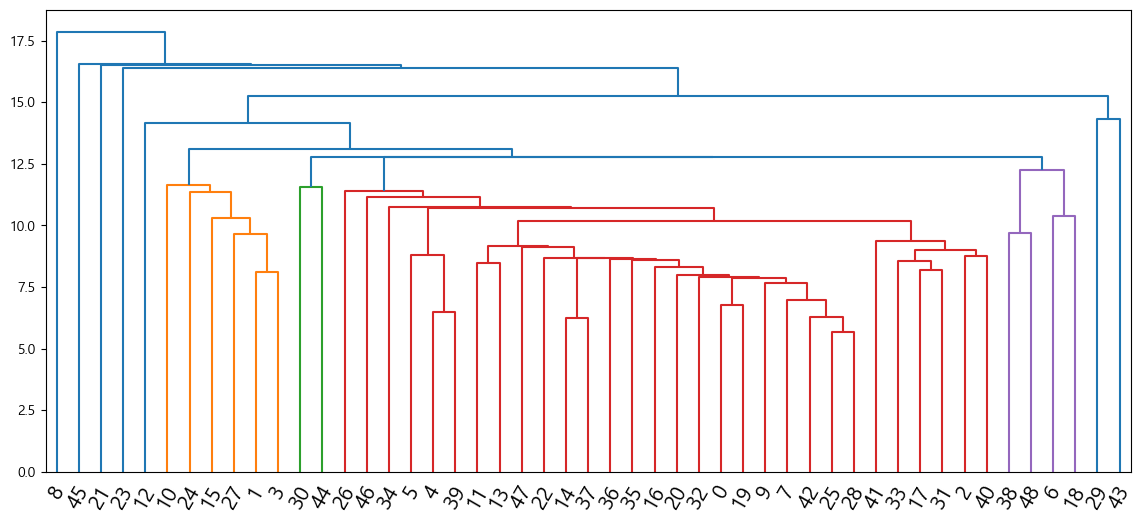

In [48]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

plt.figure(figsize=(14,6))
clust_single = linkage(분석_data, method='single')

dendrogram(clust_single)
plt.xticks(rotation=60, fontsize=15)
plt.show()

#### Complete

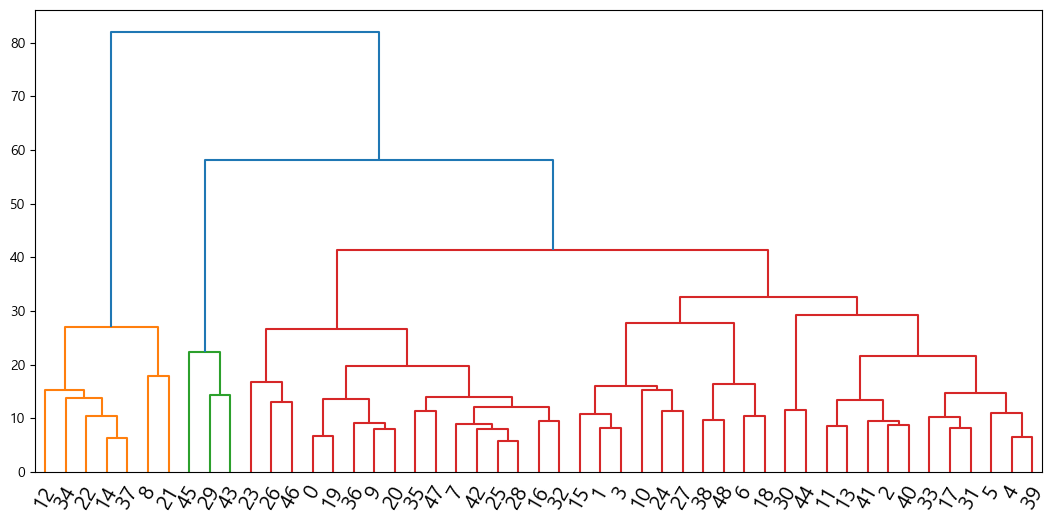

In [49]:
clust_complete = linkage(분석_data, method='complete')

plt.figure(figsize=(13,6))
dendrogram(clust_complete)
plt.xticks(rotation=60, fontsize=15)
plt.show()

#### Average

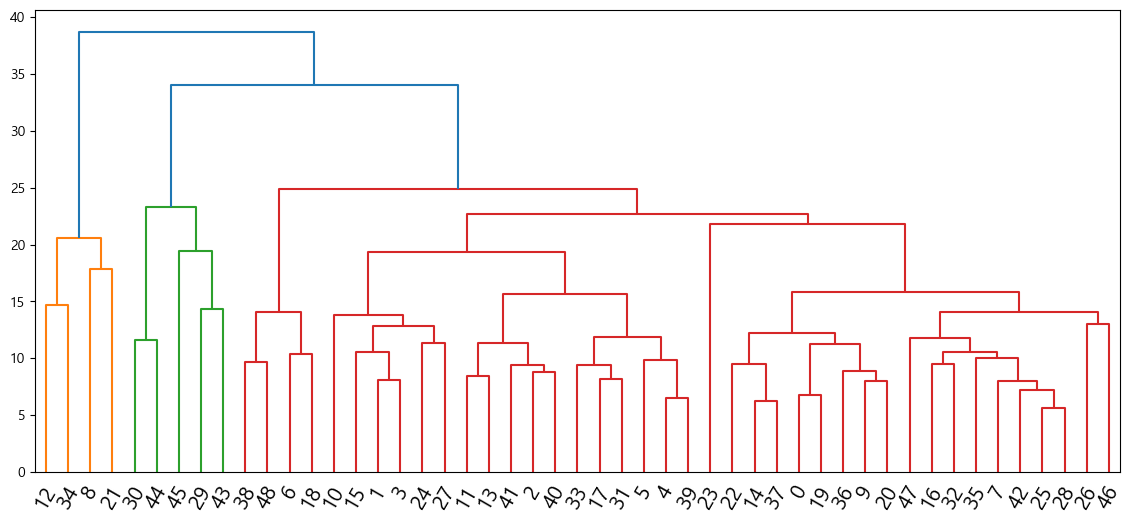

In [50]:
clust_avg = linkage(분석_data, method='average')

plt.figure(figsize=(14,6))
dendrogram(clust_avg)
plt.xticks(rotation=60, fontsize=15)
plt.show()

#### Ward

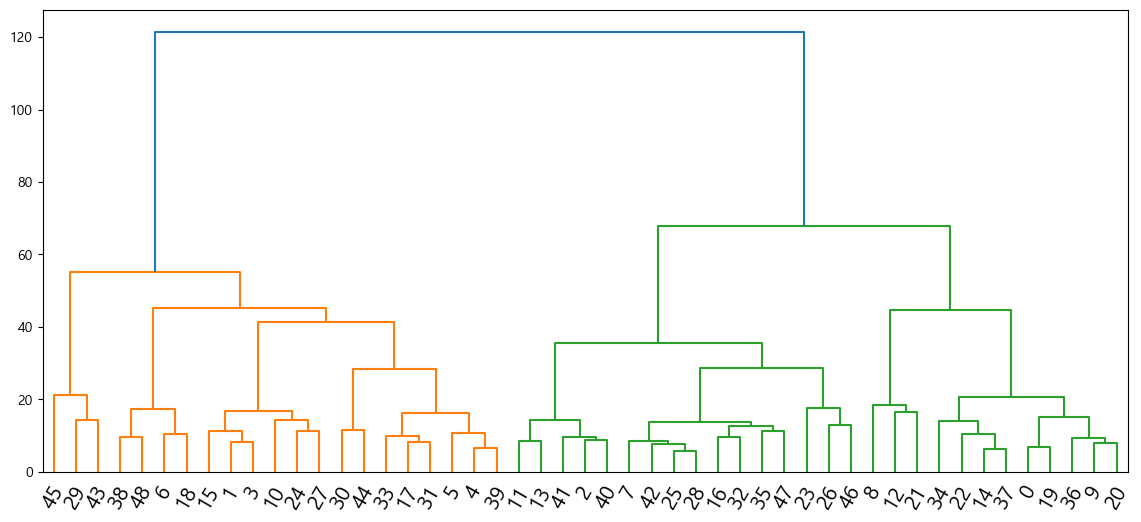

In [51]:
clust_ward = linkage(분석_data, method='ward')

plt.figure(figsize=(14,6))
dendrogram(clust_ward)
plt.xticks(rotation=60, fontsize=15)
plt.show()

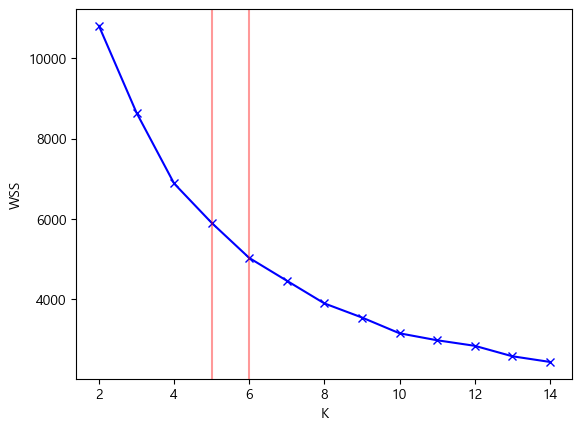

In [52]:
# 적절한 군집화 개수 파악
from sklearn.cluster import KMeans

wss=[]
for k in np.arange(2,15):
    km_k = KMeans(n_clusters=k).fit(분석_data)
    wss.append(km_k.inertia_)
    
plt.plot(np.arange(2,15),wss, 'bx-')
plt.xlabel('K')
plt.ylabel('WSS')
plt.axvline(5,c='r',alpha=0.4)
plt.axvline(6,c='r',alpha=0.4)
plt.show()

4~6개의 군집이 가장 좋다고 판단

In [53]:
# 군집분석의 해 파악
print('single :\n', pd.Series(cut_tree(clust_single, 6).squeeze()).value_counts())
print('complete :\n', pd.Series(cut_tree(clust_complete, 6).squeeze()).value_counts())
print('average :\n', pd.Series(cut_tree(clust_avg, 6).squeeze()).value_counts())
print('ward :\n', pd.Series(cut_tree(clust_ward, 6).squeeze()).value_counts())

single :
 0    43
4     2
1     1
2     1
3     1
5     1
dtype: int64
complete :
 0    16
2    11
1    10
3     7
4     3
5     2
dtype: int64
average :
 0    19
1    17
2     4
3     4
4     3
5     2
dtype: int64
ward :
 2    16
1    14
0     9
3     4
4     3
5     3
dtype: int64


가장 잘 나누어졌다고 판단되는 ward방법의 6개 군집화로 진행!!

In [54]:
# 잘 나누어진것같은 ward방법 사용
cluster = cut_tree(clust_ward, 6)
분석_data['cluster'] = cluster
분석_data.cluster = 분석_data.cluster.astype('category')
분석_data.head()

,2020년_이산화질소농도(ppm),2021년_이산화질소농도(ppm),2022년_이산화질소농도(ppm),2020년_오존농도(ppm),2021년_오존농도(ppm),2022년_오존농도(ppm),2020년_일산화탄소농도(ppm),2021년_일산화탄소농도(ppm),2022년_일산화탄소농도(ppm),2020년_아황산가스농도(ppm),...,하반기_오존농도(ppm),상반기_일산화탄소농도(ppm),하반기_일산화탄소농도(ppm),상반기_아황산가스농도(ppm),하반기_아황산가스농도(ppm),상반기_미세먼지농도(㎍/㎥),하반기_미세먼지농도(㎍/㎥),상반기_초미세먼지농도(㎍/㎥),하반기_초미세먼지농도(㎍/㎥),cluster
측정소명,,,,,,,,,,,,,,,,,,,,,
강남구,0.025456,0.023997,0.021138,0.025423,0.027077,0.033454,0.491803,0.449315,0.385197,0.002915,...,0.025613,0.479228,0.408147,0.003208,0.003126,39.459559,26.460285,22.468750,16.187373,0
강남대로,0.033691,0.031915,0.030441,0.017732,0.019964,0.022549,0.703279,0.703562,0.619408,0.003273,...,0.017224,0.683824,0.673116,0.003050,0.003151,46.139706,28.441955,22.373162,15.120163,1
강동구,0.024727,0.022315,0.018220,0.022232,0.024619,0.027214,0.457377,0.410959,0.358224,0.002828,...,0.021283,0.438603,0.382281,0.002717,0.002544,43.588235,28.126273,24.161765,16.851324,2
강변북로,0.033719,0.030652,0.031352,0.019929,0.021427,0.021967,0.624863,0.552877,0.543421,0.003484,...,0.018827,0.606801,0.540937,0.003305,0.003159,46.110294,28.024440,23.136029,16.024440,1
강북구,0.019697,0.016211,0.013437,0.024068,0.028619,0.034289,0.448907,0.399178,0.388158,0.002626,...,0.026151,0.439154,0.385132,0.002550,0.002507,43.884191,29.741344,22.976103,15.830957,1


Ex) WINTER_미세먼지농도(㎍/㎥) , SUMMER_미세먼지농도(㎍/㎥) 

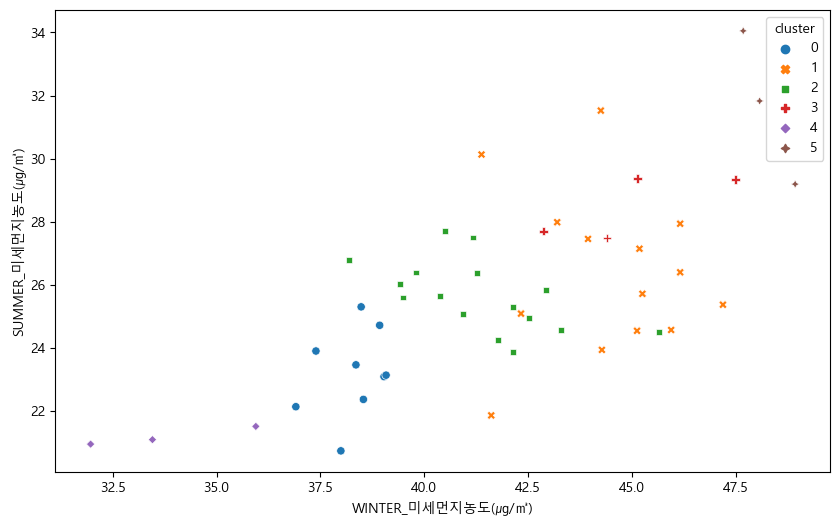

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="WINTER_미세먼지농도(㎍/㎥)", y="SUMMER_미세먼지농도(㎍/㎥)", hue="cluster", style="cluster", data=분석_data)    
plt.show()

군집별로 특성이 잘 파악되고 있음을 확인

## ***3.2. PCA***

In [101]:
분석_data_pca = 분석_data.drop(columns='cluster').copy()

In [102]:
분석_data_pca = 분석_data_pca.groupby('측정소명')[분석_data_pca.columns].mean()

In [103]:
from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화
from pca import pca
model = pca(n_components=6, normalize=True) # 표준화 진행
result = model.fit_transform(분석_data_pca)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [168] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [104]:
result['variance_ratio']

array([0.51887788, 0.12663053, 0.10190362, 0.05613754, 0.04099192,
       0.03543302])

In [105]:
# 누적분산
result['variance_ratio'].cumsum()

array([0.51887788, 0.64550841, 0.74741203, 0.80354957, 0.84454149,
       0.8799745 ])

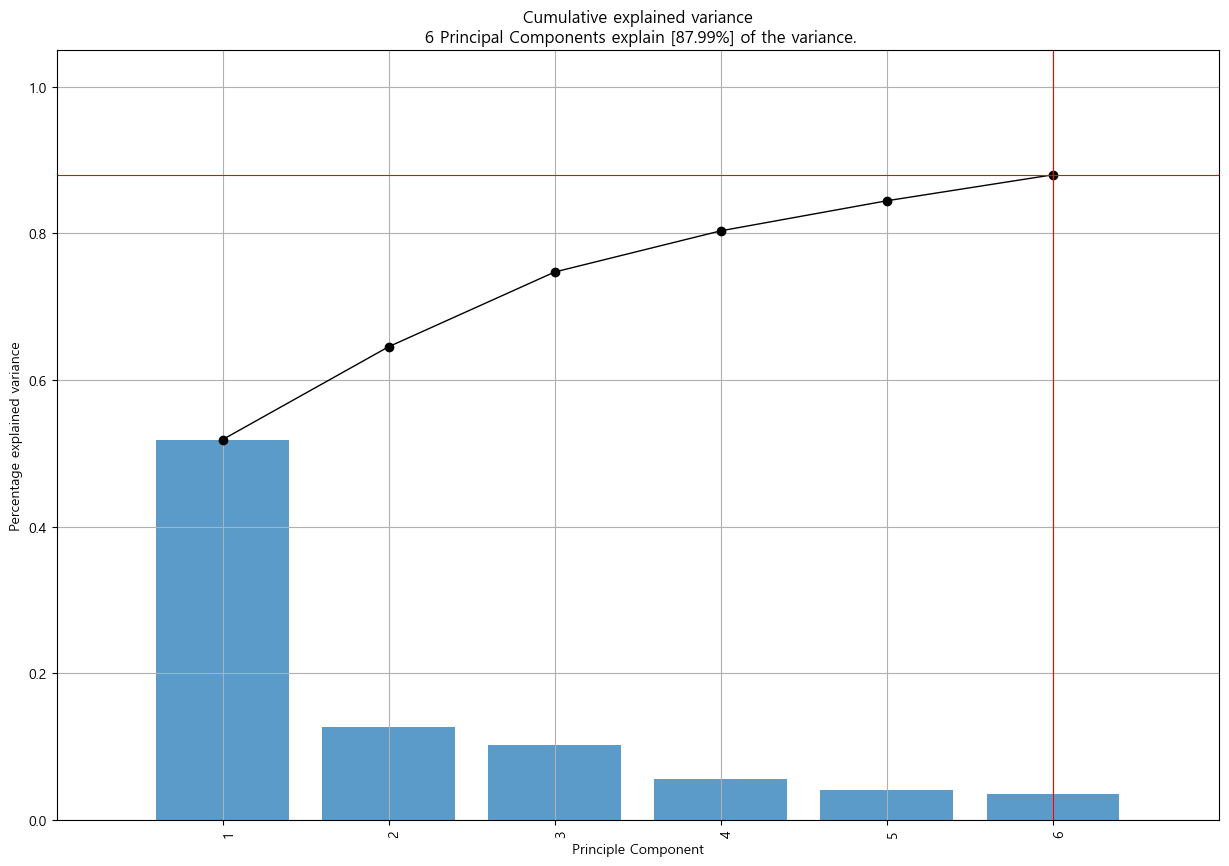

<Figure size 640x480 with 0 Axes>

In [106]:
model.plot()
plt.show()

In [107]:
result['loadings']

,2020년_이산화질소농도(ppm),2021년_이산화질소농도(ppm),2022년_이산화질소농도(ppm),2020년_오존농도(ppm),2021년_오존농도(ppm),2022년_오존농도(ppm),2020년_일산화탄소농도(ppm),2021년_일산화탄소농도(ppm),2022년_일산화탄소농도(ppm),2020년_아황산가스농도(ppm),...,상반기_오존농도(ppm),하반기_오존농도(ppm),상반기_일산화탄소농도(ppm),하반기_일산화탄소농도(ppm),상반기_아황산가스농도(ppm),하반기_아황산가스농도(ppm),상반기_미세먼지농도(㎍/㎥),하반기_미세먼지농도(㎍/㎥),상반기_초미세먼지농도(㎍/㎥),하반기_초미세먼지농도(㎍/㎥)
PC1,-0.096696,-0.097835,-0.096718,0.088826,0.093126,0.093864,-0.061835,-0.077757,-0.065666,-0.026814,...,0.096528,0.094799,-0.066290,-0.080608,-0.031888,-0.053497,-0.088503,-0.087917,-0.075444,-0.069603
PC2,-0.017879,-0.016553,-0.006049,0.053391,0.074014,0.051650,0.060079,0.069309,0.092660,0.156221,...,0.067219,0.058977,0.086069,0.066204,0.179824,0.161910,-0.026320,-0.035041,-0.020359,-0.026881
PC3,0.016692,-0.016506,0.008850,-0.040601,-0.031273,-0.047238,0.130650,0.104704,0.129376,-0.062974,...,-0.032948,-0.049206,0.135851,0.122909,-0.075462,-0.078014,-0.011732,-0.065839,-0.106792,-0.118043
PC4,0.062870,0.086800,0.092589,-0.005723,-0.018342,-0.027505,-0.106898,-0.074305,-0.005435,0.101092,...,-0.028362,-0.006861,-0.099073,-0.051660,0.075696,0.003077,0.060103,-0.025349,-0.118847,-0.143629
PC5,-0.063982,-0.075590,-0.084462,0.037227,0.048251,0.008298,0.045209,-0.012422,0.007154,0.022706,...,0.042904,0.023123,0.005346,0.027479,-0.034571,0.015162,0.159745,0.135354,-0.016395,-0.042474
PC6,-0.007443,-0.014133,0.003704,-0.003691,-0.002982,-0.007684,-0.105176,-0.000010,0.060915,0.060627,...,0.010019,-0.021824,-0.055863,-0.001562,0.067519,-0.032395,0.110716,-0.072068,0.116428,-0.122602


In [108]:
result['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
강남구,3.852906,0.688952,-2.694908,0.097532,-3.008697,-2.259084
강남대로,-12.737754,1.724075,11.774519,-1.892527,-0.214162,1.981897
강동구,1.603273,-9.419617,-3.202001,-3.345284,0.055584,1.775365
강변북로,-10.414114,0.884536,4.532021,-0.017702,-0.389232,1.701611
강북구,6.974803,-8.565968,-1.744004,-3.014491,4.781820,0.371765
강서구,-0.994582,5.885510,-6.864048,0.359619,1.790380,1.649179
공항대로,-7.242485,0.675403,-2.779558,5.498592,0.568089,1.184046
관악구,1.653739,0.093576,1.492820,2.142098,-2.116448,-3.102852
관악산,25.672945,8.896927,-3.044533,5.706716,6.044234,-4.303782
광진구,3.850921,-0.998526,2.161975,-1.700035,-0.135955,-2.381694


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [49] unique colors! Available unique colors: [9].


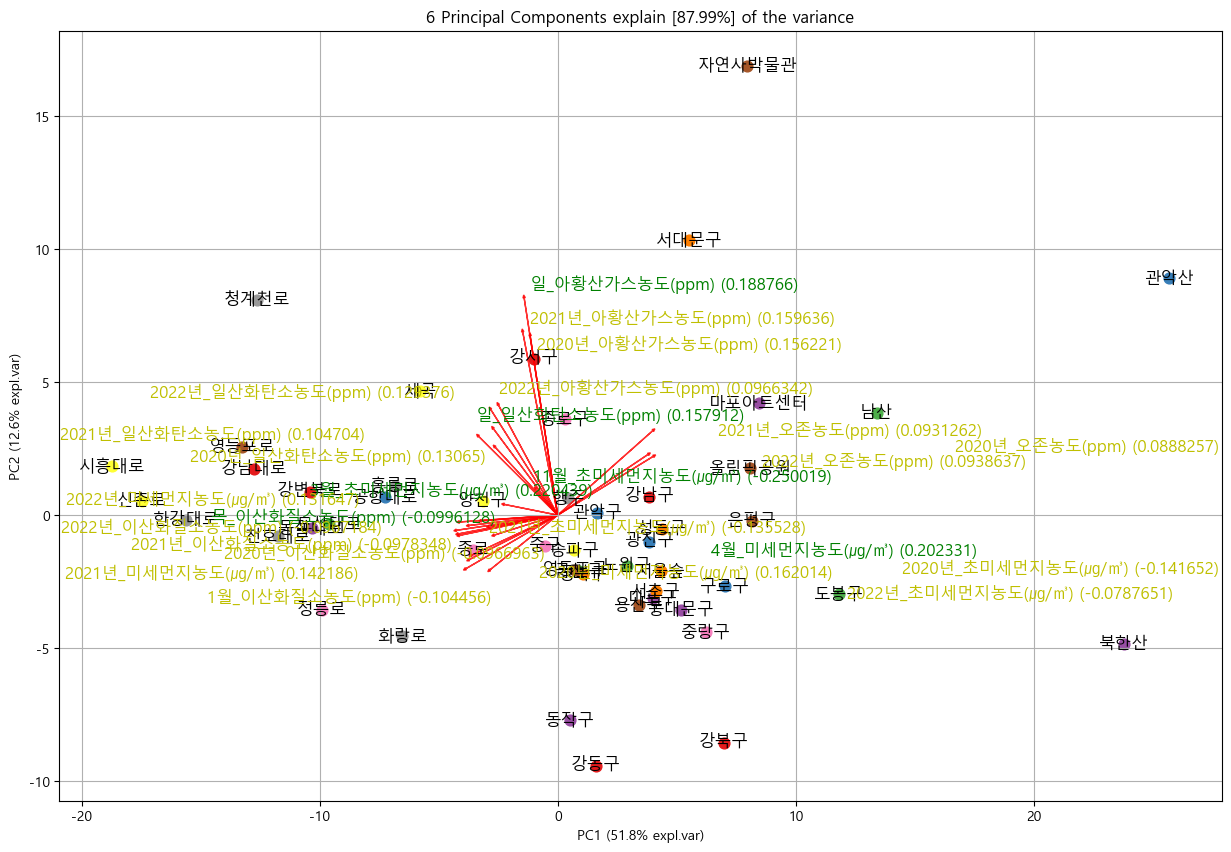

In [91]:
model.biplot(legend=False)
plt.show()

직관적으로 보았을 때 PC1이 0일 때를 기준으로 왼쪽은 차가 많이 다니는 곳 (ex. 대로변들, 다 끝에 '로'가 붙어있음)  
오른쪽은 깨끗한 지역 (ex. 산, 박물관, 공원)  
  
PC1에는 이산화질소와 미세먼지가 영향을 미치고 PC2에는 아황산가스와 일산화탄소가 영향을 미침

## ***3.3. 요인분석***

In [110]:
#!pip install factor_analyzer

In [111]:
from factor_analyzer import FactorAnalyzer

In [112]:
daegi_data2.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0
3,20200101,송파구,0.037,0.003,0.7,0.003,32.0,22.0
4,20200101,시흥대로,0.044,0.003,0.7,0.004,33.0,24.0


In [117]:
# 탐색적요인분석
fa = FactorAnalyzer(n_factors=3, rotation='varimax').fit(daegi_data2.iloc[:,2:])
# 결과 출력
print('요인적재량 :\n',pd.DataFrame(fa.loadings_, index=daegi_data2.iloc[:,2:].columns))

요인적재량 :
                      0         1         2
이산화질소농도(ppm)  0.293223  0.715414 -0.347297
오존농도(ppm)     0.042262 -0.277577  0.957202
일산화탄소농도(ppm)  0.326494  0.726757 -0.239410
아황산가스농도(ppm)  0.196419  0.505673 -0.077910
미세먼지농도(㎍/㎥)   0.728332  0.233180  0.014407
초미세먼지농도(㎍/㎥)  0.914719  0.397968 -0.021383


- Factor_1
    - 미세먼지농도, 초미세먼지농도에 대한 factor loading 값이 큼
    - "미세먼지오염"이라고 명명
- Factor_2
    - 이산화질소농도, 일산화탄소농도, 아황산가스농도에 대한 factor loading 값이 큼
    - 자동차의 배기가스에서는 질산화물질(NOx), 일산화탄소(CO), 탄화수소(HC), 총먼지(TSP : Total Solid Particlate), 아황산가스(SO2) 등 대기를 오염시키는 주요 물질 배출
    - 따라서 "자동차환경오염"이라고 명명 
- Factor_3
    - 오존농도에 대한 factor loading 값이 큼
    - "오존오염"이라고 명명     

지역들을 군집분석으로 나눈 군집들을 각각의 요인에 대해 분석하여 해당 지역에 어떠한 조치를 취하면 좋을지 파악해보자!!

# 4. ***Final Analysis and Troubleshooting***

daegi_data2 데이터에서 그림에 따라 점수를 6개요인으로 만들고 -> 3개 요인으로 만들기(평균)  
이렇게 한 결과를 군집화 된 결과에 점수를 비교 -> 점수가 낮은 군집에 대한 조치를 취한다(지역 특징 파악)  
좋음 : 6, 보통 : 4, 나쁨 : 2, 매우나쁨 : 0 으로 점수를 부여

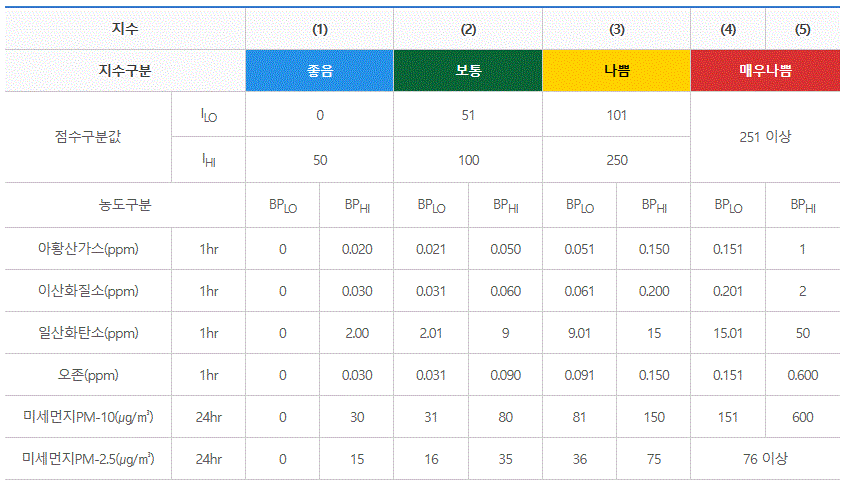

[출처] https://www.gb.go.kr/Main/open_contents/section/air/page.do?mnu_uid=5215&LARGE_CODE=460&MEDIUM_CODE=30&SMALL_CODE=30&&mnu_order=3

In [118]:
daegi_data2.columns[2:]

Index(['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)',
       '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)'],
      dtype='object')

In [149]:
# 위의 표를 바탕으로 점수 설정 (좋음 : 6, 보통 : 4, 나쁨 : 2, 매우나쁨 : 0)
daegi_data2['이산화질소점수'] = daegi_data2['이산화질소농도(ppm)'].apply(lambda x : 6 if x<=0.03 else 4 
                                                                                            if x<=0.06 else 2 
                                                                                            if x<=0.2 else 0)

daegi_data2['오존점수'] = daegi_data2['오존농도(ppm)'].apply(lambda x : 6 if x<=0.03 else 4 
                                                                                            if x<=0.09 else 2 
                                                                                            if x<=0.15 else 0)

daegi_data2['일산화탄소점수'] = daegi_data2['일산화탄소농도(ppm)'].apply(lambda x : 6 if x<=2 else 4 
                                                                                            if x<=9 else 2 
                                                                                            if x<=15 else 0)

daegi_data2['아황산가스점수'] = daegi_data2['아황산가스농도(ppm)'].apply(lambda x : 6 if x<=0.02 else 4 
                                                                                            if x<=0.05 else 2
                                                                                            if x<=0.15 else 0)

daegi_data2['미세먼지점수'] = daegi_data2['미세먼지농도(㎍/㎥)'].apply(lambda x : 6 if x<=30 else 4 
                                                                                            if x<=80 else 2 
                                                                                            if x<=150 else 0)

daegi_data2['초미세먼지점수'] = daegi_data2['초미세먼지농도(㎍/㎥)'].apply(lambda x : 6 if x<=15 else 4 
                                                                                            if x<=35 else 2
                                                                                            if x<=75 else 0)

In [150]:
daegi_data2.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),이산화질소점수,오존점수,일산화탄소점수,아황산가스점수,미세먼지점수,초미세먼지점수,자동차환경오염,미세먼지오염
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0,4,6,6,6,4,4,5.333,4.0
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0,4,6,6,6,4,4,5.333,4.0
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0,6,6,6,6,6,4,6.000,5.0
3,20200101,송파구,0.037,0.003,0.7,0.003,32.0,22.0,4,6,6,6,4,4,5.333,4.0
4,20200101,시흥대로,0.044,0.003,0.7,0.004,33.0,24.0,4,6,6,6,4,4,5.333,4.0


In [151]:
daegi_data2.groupby('측정소명')['이산화질소점수'].mean().sort_values(ascending=False)

측정소명
관악산       5.992271
북한산       5.988406
은평구       5.793237
도봉구       5.775845
남산        5.773913
강북구       5.750725
자연사박물관    5.744928
서대문구      5.719807
올림픽공원     5.683092
광진구       5.683092
용산구       5.642512
행주        5.615459
마포아트센터    5.590338
노원구       5.586473
구로구       5.580676
중랑구       5.578744
종로구       5.555556
강동구       5.547826
강서구       5.536232
강남구       5.534300
동작구       5.528502
동대문구      5.524638
서울숲       5.524638
금천구       5.484058
성동구       5.480193
중구        5.478261
세곡        5.478261
영등포구      5.476329
양천구       5.470531
서초구       5.468599
성북구       5.414493
마포구       5.389372
관악구       5.389372
송파구       5.373913
종로        5.344928
청계천로      5.246377
도산대로      5.186473
한강대로      5.176812
공항대로      5.113043
홍릉로       5.103382
천호대로      4.964251
강남대로      4.962319
화랑로       4.944928
강변북로      4.894686
영등포로      4.778744
정릉로       4.771014
신촌로       4.604831
시흥대로      4.506280
동작대로      4.506280
Name: 이산화질소점수, dtype: float64

In [152]:
daegi_data2.groupby('측정소명')['오존점수'].mean().sort_values(ascending=False)

측정소명
한강대로      5.793237
강남대로      5.721739
신촌로       5.671498
화랑로       5.659903
강변북로      5.617391
영등포로      5.609662
정릉로       5.605797
시흥대로      5.571014
동작대로      5.543961
천호대로      5.528502
공항대로      5.499517
종로        5.468599
홍릉로       5.466667
도산대로      5.449275
세곡        5.424155
용산구       5.375845
강동구       5.371981
청계천로      5.350725
서울숲       5.348792
금천구       5.300483
영등포구      5.294686
행주        5.275362
양천구       5.259903
중구        5.259903
동작구       5.257971
성북구       5.256039
관악구       5.252174
마포구       5.244444
광진구       5.236715
송파구       5.234783
강북구       5.205797
강남구       5.174879
중랑구       5.172947
성동구       5.157488
강서구       5.157488
노원구       5.155556
종로구       5.145894
서대문구      5.136232
올림픽공원     5.136232
서초구       5.128502
도봉구       5.095652
동대문구      5.091787
구로구       5.051208
은평구       5.041546
북한산       4.902415
마포아트센터    4.885024
남산        4.838647
자연사박물관    4.784541
관악산       4.444444
Name: 오존점수, dtype: float64

In [153]:
daegi_data2.groupby('측정소명')['미세먼지점수'].mean().sort_values(ascending=False)

측정소명
북한산       5.263768
관악산       5.178744
올림픽공원     5.145894
남산        5.126570
서대문구      5.099517
도봉구       5.082126
마포아트센터    5.072464
마포구       5.064734
자연사박물관    5.058937
강남구       5.039614
은평구       5.010628
광진구       5.006763
동대문구      5.006763
영등포구      5.006763
관악구       5.004831
성동구       4.975845
서울숲       4.971981
금천구       4.966184
노원구       4.960386
행주        4.958454
중랑구       4.954589
중구        4.948792
성북구       4.944928
종로구       4.941063
송파구       4.923671
화랑로       4.923671
용산구       4.914010
서초구       4.904348
강동구       4.894686
정릉로       4.883092
구로구       4.879227
홍릉로       4.869565
강변북로      4.857971
영등포로      4.854106
종로        4.852174
세곡        4.852174
양천구       4.840580
강북구       4.838647
강서구       4.827053
강남대로      4.823188
동작구       4.819324
동작대로      4.803865
청계천로      4.771014
도산대로      4.763285
공항대로      4.742029
신촌로       4.685990
천호대로      4.620290
시흥대로      4.620290
한강대로      4.488889
Name: 미세먼지점수, dtype: float64

In [154]:
daegi_data2.groupby('측정소명')['초미세먼지점수'].mean().sort_values(ascending=False)

측정소명
관악산       5.029952
북한산       5.024155
서울숲       4.915942
남산        4.912077
도봉구       4.834783
서대문구      4.832850
자연사박물관    4.815459
중랑구       4.807729
성북구       4.807729
마포아트센터    4.805797
관악구       4.805797
구로구       4.786473
강남대로      4.786473
성동구       4.771014
행주        4.771014
동작대로      4.769082
마포구       4.761353
화랑로       4.761353
올림픽공원     4.755556
서초구       4.745894
광진구       4.742029
세곡        4.738164
공항대로      4.716908
도산대로      4.713043
종로        4.713043
용산구       4.711111
은평구       4.709179
송파구       4.701449
강남구       4.684058
강변북로      4.680193
동대문구      4.676329
한강대로      4.668599
영등포구      4.666667
강북구       4.653140
강서구       4.641546
천호대로      4.637681
홍릉로       4.620290
종로구       4.612560
영등포로      4.599034
강동구       4.587440
금천구       4.577778
노원구       4.562319
중구        4.560386
양천구       4.554589
동작구       4.525604
신촌로       4.485024
시흥대로      4.477295
정릉로       4.471498
청계천로      4.347826
Name: 초미세먼지점수, dtype: float64

In [156]:
print(daegi_data2['이산화질소점수'].value_counts())
print(daegi_data2['오존점수'].value_counts())
print(daegi_data2['일산화탄소점수'].value_counts()) # 일산화탐소 점수는 모두 좋음
print(daegi_data2['아황산가스점수'].value_counts()) # 아황산가스 점수는 모두 좋음
print(daegi_data2['미세먼지점수'].value_counts())
print(daegi_data2['초미세먼지점수'].value_counts())

6    35765
4    14509
2      441
Name: 이산화질소점수, dtype: int64
6    32444
4    18253
2       17
0        1
Name: 오존점수, dtype: int64
6    50715
Name: 일산화탄소점수, dtype: int64
6    50715
Name: 아황산가스점수, dtype: int64
6    25235
4    23742
2     1551
0      187
Name: 미세먼지점수, dtype: int64
6    23554
4    21817
2     5006
0      338
Name: 초미세먼지점수, dtype: int64


6개의 피처를 3개의 군집 요인으로 묶어 점수 평균을 구한다.

In [157]:
# 오존오염은 오존점수 그대로 활용
daegi_data2['자동차환경오염'] = round((daegi_data2['이산화질소점수']+daegi_data2['일산화탄소점수']+daegi_data2['아황산가스점수'])/3,3)
daegi_data2['미세먼지오염'] = (daegi_data2['미세먼지점수']+daegi_data2['초미세먼지점수'])/2

In [158]:
daegi_data2.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),이산화질소점수,오존점수,일산화탄소점수,아황산가스점수,미세먼지점수,초미세먼지점수,자동차환경오염,미세먼지오염
0,20200101,강남구,0.037,0.003,0.7,0.003,31.0,23.0,4,6,6,6,4,4,5.333,4.0
1,20200101,성북구,0.044,0.004,0.9,0.003,33.0,21.0,4,6,6,6,4,4,5.333,4.0
2,20200101,세곡,0.015,0.005,0.8,0.004,27.0,18.0,6,6,6,6,6,4,6.000,5.0
3,20200101,송파구,0.037,0.003,0.7,0.003,32.0,22.0,4,6,6,6,4,4,5.333,4.0
4,20200101,시흥대로,0.044,0.003,0.7,0.004,33.0,24.0,4,6,6,6,4,4,5.333,4.0


In [159]:
# 분석과 같이 항동과 궁동 지역의 데이터를 제거하고 판단
daegi_data2 = daegi_data2[daegi_data2.측정소명!="항동"]
daegi_data2 = daegi_data2[daegi_data2.측정소명!="궁동"]

In [160]:
# 지역별 3개년 환경오염점수 평균
ozone_score = daegi_data2.groupby('측정소명')['오존점수'].mean()
car_score = daegi_data2.groupby('측정소명')['자동차환경오염'].mean()
mise_score = daegi_data2.groupby('측정소명')['미세먼지오염'].mean()

In [161]:
ozone_score.mean(), car_score.mean(), mise_score.mean()

(5.278714384304447, 5.797587380459429, 4.81202799960564)

분석 결과에 환경오염점수 추가

In [162]:
분석_data['지역별오존오염평균'] = ozone_score
분석_data['지역별자동차환경오염평균'] = car_score
분석_data['지역별미세먼지오염평균'] = mise_score

In [163]:
분석_data.head()

,2020년_이산화질소농도(ppm),2021년_이산화질소농도(ppm),2022년_이산화질소농도(ppm),2020년_오존농도(ppm),2021년_오존농도(ppm),2022년_오존농도(ppm),2020년_일산화탄소농도(ppm),2021년_일산화탄소농도(ppm),2022년_일산화탄소농도(ppm),2020년_아황산가스농도(ppm),...,상반기_아황산가스농도(ppm),하반기_아황산가스농도(ppm),상반기_미세먼지농도(㎍/㎥),하반기_미세먼지농도(㎍/㎥),상반기_초미세먼지농도(㎍/㎥),하반기_초미세먼지농도(㎍/㎥),cluster,지역별오존오염평균,지역별자동차환경오염평균,지역별미세먼지오염평균
측정소명,,,,,,,,,,,,,,,,,,,,,
강남구,0.025456,0.023997,0.021138,0.025423,0.027077,0.033454,0.491803,0.449315,0.385197,0.002915,...,0.003208,0.003126,39.459559,26.460285,22.468750,16.187373,0,5.174879,5.844692,4.861836
강남대로,0.033691,0.031915,0.030441,0.017732,0.019964,0.022549,0.703279,0.703562,0.619408,0.003273,...,0.003050,0.003151,46.139706,28.441955,22.373162,15.120163,1,5.721739,5.653941,4.804831
강동구,0.024727,0.022315,0.018220,0.022232,0.024619,0.027214,0.457377,0.410959,0.358224,0.002828,...,0.002717,0.002544,43.588235,28.126273,24.161765,16.851324,2,5.371981,5.849203,4.741063
강변북로,0.033719,0.030652,0.031352,0.019929,0.021427,0.021967,0.624863,0.552877,0.543421,0.003484,...,0.003305,0.003159,46.110294,28.024440,23.136029,16.024440,1,5.617391,5.631386,4.769082
강북구,0.019697,0.016211,0.013437,0.024068,0.028619,0.034289,0.448907,0.399178,0.388158,0.002626,...,0.002550,0.002507,43.884191,29.741344,22.976103,15.830957,1,5.205797,5.916867,4.745894


In [164]:
# 6에 가까울 수록 좋음
print('오존오염 :\n',분석_data.groupby('cluster')['지역별오존오염평균'].mean())
print('자동차환경오염 :\n',분석_data.groupby('cluster')['지역별자동차환경오염평균'].mean())
print('미세먼지오염 :\n',분석_data.groupby('cluster')['지역별미세먼지오염평균'].mean())

오존오염 :
 cluster
0    5.081696
1    5.383851
2    5.260024
3    5.577295
4    4.728502
5    5.630918
Name: 지역별오존오염평균, dtype: float64
자동차환경오염 :
 cluster
0    5.885650
1    5.757790
2    5.828582
3    5.611108
4    5.972719
5    5.627323
Name: 지역별자동차환경오염평균, dtype: float64
미세먼지오염 :
 cluster
0    4.917874
1    4.733540
2    4.824940
3    4.758937
4    5.089211
5    4.585507
Name: 지역별미세먼지오염평균, dtype: float64


In [166]:
print('cluster 0 : ',분석_data.query('cluster==0').index)
print('cluster 1 : ',분석_data.query('cluster==1').index)
print('cluster 2 : ',분석_data.query('cluster==2').index)
print('cluster 3 : ',분석_data.query('cluster==3').index)
print('cluster 4 : ',분석_data.query('cluster==4').index)
print('cluster 5 : ',분석_data.query('cluster==5').index)

cluster 0 :  Index(['강남구', '광진구', '도봉구', '마포구', '마포아트센터', '서대문구', '올림픽공원', '은평구', '자연사박물관'], dtype='object', name='측정소명')
cluster 1 :  Index(['강남대로', '강변북로', '강북구', '강서구', '구로구', '도산대로', '동작구', '서초구', '세곡', '신촌로',
       '양천구', '영등포로', '종로', '청계천로'],
      dtype='object', name='측정소명')
cluster 2 :  Index(['강동구', '관악구', '금천구', '노원구', '동대문구', '서울숲', '성동구', '성북구', '송파구', '영등포구',
       '용산구', '종로구', '중구', '중랑구', '행주', '홍릉로'],
      dtype='object', name='측정소명')
cluster 3 :  Index(['공항대로', '동작대로', '정릉로', '화랑로'], dtype='object', name='측정소명')
cluster 4 :  Index(['관악산', '남산', '북한산'], dtype='object', name='측정소명')
cluster 5 :  Index(['시흥대로', '천호대로', '한강대로'], dtype='object', name='측정소명')


**서울시 간선도로 지점별 교통량 통계**  
[출처] https://data.seoul.go.kr/dataList/10692/S/2/datasetView.do;jsessionid=57A259531068A4DD2C15F58EF34CE17B.new_portal-svr-21

간선도로 종류 : 강남대로, 강변북로, 도산대로, 신촌로, 영등포로, 청계천로 / 홍릉로 / 공항대로, 동작대로, 정릉로, 화랑로 / 시흥대로, 천호대로, 한강대로

In [183]:
gyotong = pd.read_csv(os.path.abspath("../프로젝트/Data")+'/간선도로+지점별+교통량_20221216054656.csv').rename(columns={'간선도로 지점별(1)':'지점'}).sort_values('지점')

cluster0

In [168]:
gyotong.query('지점=="강남대로(신사역)"')

,지점,2017,2018,2019,2020,2021
42,강남대로(신사역),102260,76324,74310,69076,64676


In [169]:
gyotong.query('지점=="영등포로(오목교)"')

,지점,2017,2018,2019,2020,2021
24,영등포로(오목교),60743,60525,60395,57983,55163


cluster3

In [170]:
gyotong.query('지점=="공항대로(발산역)"')

,지점,2017,2018,2019,2020,2021
20,공항대로(발산역),-,55298,53057,49224,50328


In [171]:
gyotong.query('지점=="동작대로(총신대)"')

,지점,2017,2018,2019,2020,2021
30,동작대로(총신대),114621,91084,89433,84243,82634


In [172]:
gyotong.query('지점=="화랑로(화랑대역)"')

,지점,2017,2018,2019,2020,2021
9,화랑로(화랑대역),82626,68491,69384,67887,67211


cluster5

In [173]:
gyotong.query('지점=="천호대로(군자교)"')

,지점,2017,2018,2019,2020,2021
4,천호대로(군자교),89346,88166,87339,83631,81095


In [174]:
gyotong.query('지점=="시흥대로(구로디지털단지역)"')

,지점,2017,2018,2019,2020,2021
25,시흥대로(구로디지털단지역),83401,79366,77602,72929,70587


In [176]:
gyotong.head()

,지점,2017,2018,2019,2020,2021
34,강남대로(강남역-신분당),75243,58497,59020,55588,53898
42,강남대로(신사역),102260,76324,74310,69076,64676
19,강서로(화곡터널),41244,39923,39662,38216,37711
22,경인로(거리공원입구교차로),54732,54116,53049,51005,46190
27,경인로(서울교),95127,94691,94686,89962,90915


### 군집화 결과 분석  
- cluster 0 : 비교적 최근 교통량이 적고, 강남구, 광진구, 마포구, 서대문구, 은평구 등으로 군집화되었다.
- cluster 1 : 강북구, 강서구와 같이 비교적 조용한 지역과 청계천, 종로 등의 지역으로 군집화되었다.
- cluster 2 : 관악구, 강동구, 서울숲같이 유동인구는 많지만 거주하는 인구는 상대적으로 적은 지역으로 군집화되었다. 
- cluster 3 : 공항대로, 동작대로, 정릉로, 화랑로같이 도로 위주로 군집화되었다.
- cluster 4 : 산에 있는 측정소로 군집화되었다. 미세먼지가 제일 적고 자동차 오염이 제일 적으며, 오존 오염정도가 가장 높다는 특징을 지닌다.
- cluster 5 : 미세먼지점수가 제일 안좋은 시흥대로, 천호대로, 한강대로로 대로변 위주로 군집화되었다.

### 지도 데이터 시각화

측정소 정보 Data  
[출처] https://www.airkorea.or.kr/web/stationInfo?pMENU_NO=93

In [177]:
location_1 = pd.read_excel(os.path.abspath("../프로젝트/Data")+"/station_list_도시대기.xls", skiprows=3)
location_2 = pd.read_excel(os.path.abspath("../프로젝트/Data")+"/station_list_도로변대기.xls", skiprows=3)

In [178]:
location = pd.concat([location_1, location_2]).reset_index(drop = True)

In [179]:
loc_주소 = location[['측정소명', '측정소 주소']]

In [180]:
loc_주소.loc[loc_주소['측정소명'] == '동작대로 중앙차로', '측정소명'] = '동작대로'

C:\Users\choij\AppData\Local\Temp\ipykernel_12408\1425490239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_주소.loc[loc_주소['측정소명'] == '동작대로 중앙차로', '측정소명'] = '동작대로'


In [181]:
loc_위치 = idx_data.merge(loc_주소, how = 'left')
loc_위치=loc_위치.assign(도로명주소=np.nan)  # 도로명 주소 추가 위한 빈 column 생성

In [152]:
# #측정소 주소 및 도로명 주소 기입 Program

# for i in loc_위치['측정소명']:
#     print(i,'측정소 주소는 = ', loc_위치.loc[loc_위치['측정소명'] == i, '측정소 주소'])
#     loca = input(i+'측정소 도로명 주소를 입력해주세요.')
#     loc_위치.loc[loc_위치['측정소명'] == i, '도로명주소'] = loca

강남구 측정소 주소는 =  0    서울 강남구 학동로 426 강남구청 별관 1동
Name: 측정소 주소, dtype: object
강남구측정소 도로명 주소를 입력해주세요.서울특별시 강남구 삼성동 16-1
강남대로 측정소 주소는 =  1    서울특별시 서초구 강남대로 201 서초구민회관 앞 중앙차로 (양재동)
Name: 측정소 주소, dtype: object
강남대로측정소 도로명 주소를 입력해주세요.서울특별시 서초구 강남대로 201
강동구 측정소 주소는 =  2    서울 강동구 구천면로 42길 59 천호1동 주민센터
Name: 측정소 주소, dtype: object
강동구측정소 도로명 주소를 입력해주세요.서울특별시 강동구 구천면로42길 59
강변북로 측정소 주소는 =  3    서울 성동구 강변북로 257 한강사업본부 옆
Name: 측정소 주소, dtype: object
강변북로측정소 도로명 주소를 입력해주세요.서울특별시 성동구 강변북로 257
강북구 측정소 주소는 =  4    서울 강북구 삼양로 139길 49 우이동 주민센터
Name: 측정소 주소, dtype: object
강북구측정소 도로명 주소를 입력해주세요.서울특별시 강북구 삼양로139길 49
강서구 측정소 주소는 =  5    서울 강서구 강서로 45 다길 71 화곡3동 푸른들청소년도서관
Name: 측정소 주소, dtype: object
강서구측정소 도로명 주소를 입력해주세요.서울특별시 강서구 화곡동 강서로45다길 71
공항대로 측정소 주소는 =  6    서울 강서구 마곡동 727-1091 마곡역 중앙차로정류장 옆
Name: 측정소 주소, dtype: object
공항대로측정소 도로명 주소를 입력해주세요.서울특별시 마곡역
관악구 측정소 주소는 =  7    서울 관악구 신림동길 14 신림동 주민센터
Name: 측정소 주소, dtype: object
관악구측정소 도로명 주소를 입력해주세요.서울특별시 관악구 신림동길 14
관악산 측정소 주소는 =  8    NaN
Name: 측정소 주소, dtyp

In [107]:
loc_위치.loc[loc_위치['측정소명'] == '관악산', '도로명주소'] = '과천시 자하동길 64'

***
#### ***여기서 부터는 데이터 생성 과정이여서 아래에 있는 data폴더에서 읽어들이는 부분만 돌리면 됩니다.***
***

### ***위도 경도 반환***

In [109]:
#!pip install geopy

In [156]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [157]:
address = loc_위치['도로명주소']

In [158]:
#####주소를 위,경도 값으로 변환하기 #####
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [159]:
#####Dataframe만들기######
address_df = pd.DataFrame({'측정소명': loc_위치['측정소명'],'주소':address,'위도':latitude,'경도':longitude})

In [160]:
address_df[address_df['위도'] == 0]

,측정소명,주소,위도,경도
8,관악산,과천시 자하동길 64,0.0,0.0
11,궁동,경기 부천시 소사구 경인옛로 73소사어울마당,0.0,0.0
15,도봉구,서울특별시 도봉구 시루봉로2길 34,0.0,0.0
21,마포아트센터,마포구 대흥로20길 28(마포아트센터),0.0,0.0
22,북한산,강북구 삼양로 181길 387 (우이령 전경대 위),0.0,0.0
24,서울숲,성동구 뚝섬로 273(서울숲 방문자센터 옆),0.0,0.0
28,세곡,강남구 밤고개로 337 (세곡사거리),0.0,0.0
30,시흥대로,서울특별시 금천구 독산동 968,0.0,0.0
31,신촌로,서울 마포구 노고산동 57-62 (신촌역 7번 출구),0.0,0.0
35,올림픽공원,송파구 올림픽로 424(서울역사편찬원),0.0,0.0


반환이 되지 않은 주소의 위도 경도 수기로 기입.(google map 활용)

In [161]:
address_df.loc[address_df['측정소명'] == '관악산', '위도'] = 37.4432
address_df.loc[address_df['측정소명'] == '관악산', '경도'] = 126.9673

In [162]:
address_df.loc[address_df['측정소명'] == '궁동', '위도'] = 37.48
address_df.loc[address_df['측정소명'] == '궁동', '경도'] = 126.7999

In [163]:
address_df.loc[address_df['측정소명'] == '도봉구', '위도'] = 37.6541
address_df.loc[address_df['측정소명'] == '도봉구', '경도'] = 127.0291

In [164]:
address_df.loc[address_df['측정소명'] == '마포아트센터', '위도'] = 37.5497
address_df.loc[address_df['측정소명'] == '마포아트센터', '경도'] = 126.9456

In [165]:
address_df.loc[address_df['측정소명'] == '북한산', '위도'] = 37.6789
address_df.loc[address_df['측정소명'] == '북한산', '경도'] = 127.0023

In [166]:
address_df.loc[address_df['측정소명'] == '서울숲', '위도'] = 37.5429
address_df.loc[address_df['측정소명'] == '서울숲', '경도'] = 127.0417

In [167]:
address_df.loc[address_df['측정소명'] == '세곡', '위도'] = 37.464
address_df.loc[address_df['측정소명'] == '세곡', '경도'] = 127.109

In [168]:
address_df.loc[address_df['측정소명'] == '시흥대로', '위도'] = 37.4754
address_df.loc[address_df['측정소명'] == '시흥대로', '경도'] = 126.8993

In [169]:
address_df.loc[address_df['측정소명'] == '신촌로', '위도'] = 37.5549
address_df.loc[address_df['측정소명'] == '신촌로', '경도'] = 126.9362

In [170]:
address_df.loc[address_df['측정소명'] == '올림픽공원', '위도'] = 37.5217
address_df.loc[address_df['측정소명'] == '올림픽공원', '경도'] = 127.1244

In [171]:
address_df.loc[address_df['측정소명'] == '자연사박물관', '위도'] = 37.5767
address_df.loc[address_df['측정소명'] == '자연사박물관', '경도'] = 126.9378

In [120]:
# 위 분석에서 제외했던 항동, 궁동 제거
address_df = address_df[address_df['측정소명'] != '항동']
address_df = address_df[address_df['측정소명'] != '궁동']

In [172]:
# df 저장

In [210]:
address_df.to_csv('address_df.csv', encoding = 'cp949', index = False)

***
***

In [211]:
address_df = pd.read_csv(os.path.abspath("../프로젝트/Data")+"/address_df.csv" , encoding = 'cp949')

In [212]:
address_df = address_df.reset_index(drop = True)

In [213]:
address_df = pd.concat([address_df, 분석_data.reset_index()[['cluster']]], axis = 1)

### ***folium 패키지를 이용한 시각화***

In [187]:
# !pip install folium

In [215]:
import folium
from folium import FeatureGroup, LayerControl, Map, Marker

In [216]:
# map 출발지점은 국민대학교 위치로 설정

# 위도
국민대_latitude = 37.6109
# 경도
국민대_longitude = 126.9973

In [217]:
m = folium.Map(location=[국민대_latitude, 국민대_longitude],
               zoom_start=17
              )

### ***군집화 결과 분석***  
- Cluster 0 : 비교적 최근 교통량이 적고, 강남구, 광진구, 마포구, 서대문구, 은평구 등으로 군집화되었다.
- Cluster 1 : 강북구, 강서구와 같이 사람이 많이 거주하는 지역과 청계천, 종로 등의 지역으로 군집화되었다.
- Cluster 2 : 관악구, 강동구, 서울숲같이 유동인구는 많지만 거주하는 인구는 상대적으로 적은 지역으로 군집화되었다.
- Cluster 3 : 공항대로, 동작대로, 정릉로, 화랑로같이 도로 위주로 군집화되었다.
- Cluster 4 : 산에 있는 측정소로 군집화. 미세먼지가 제일 적고 자동차 오염이 제일 적으며, 오존 오염정도가 가장 높다는 특징을 지닌다.
- Cluster 5 : 미세먼지오염 점수가 가장 낮은 시흥대로, 천호대로, 한강대로로 대로변 위주로 군집화되었다.

In [218]:
# 그룹만들기
g0 = FeatureGroup(name = 'cluster 0')
g1 = FeatureGroup(name = 'cluster 1')
g2 = FeatureGroup(name = 'cluster 2')
g3 = FeatureGroup(name = 'cluster 3')
g4 = FeatureGroup(name = 'cluster 4')
g5 = FeatureGroup(name = 'cluster 5')

In [219]:
# address에 있는 좌표 하나씩 해당 cluster group에 찍기
for row in address_df.itertuples():
    idx, 측정소명, 주소, latitude, longitude, cluster = row
    
    if cluster == 0:  # 비교적 최근 교통량이 적음.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='darkblue',
               icon='landmark',
               prefix='fa'
               )).add_to(g0)
        
    elif cluster == 1:  # 비교적 조용한 지역과 청계천, 종로 등의 지역.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='purple',
               icon='user',
               prefix='fa'
               )).add_to(g1)
    
    elif cluster == 2:  # 유동인구는 많지만 거주하는 인구는 상대적으로 적은 지역으로 군집화되었다.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='darkred',
               icon='building-user',
               prefix='fa'
               )).add_to(g2)
        
    elif cluster == 3:  # 공항대로, 동작대로, 정릉로, 화랑로같이 도로 위주로 군집화되었다.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='cadetblue',
               icon='car-side',
               prefix='fa'
               )).add_to(g3)
        
    elif cluster == 4:  # 산에 있는 측정소
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='green',
               icon='mountain-sun',
               prefix='fa'
               )).add_to(g4)
                      
    elif cluster == 5:  # 시흥대로, 천호대로, 한강대로로 대로변 위주
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='black',
               icon='road',
               prefix='fa'
               )).add_to(g5)
    
g0.add_to(m)
g1.add_to(m)
g2.add_to(m)
g3.add_to(m)
g4.add_to(m)
g5.add_to(m)

LayerControl(collapsed=False).add_to(m)

In [220]:
m

cluster 0 = 올림픽공원, 마포아트센터, 강남구, 자연사박물관등이 포진 -> landmark icon 생성  
cluster 1 = 비교적 조용한 지역과 청계천, 종로 등의 지역 -> 그냥 사람 사는데라 생각해서 user icon 생성  
cluster 2 = 유동인구는 많지만 거주하는 인구는 상대적으로 적은 지역 -> 회사들이 많은 곳으로 생각 building icon 생성  
cluster 3 = 공항대로, 동작대로, 정릉로, 화랑로같이 도로 위주 -> 차가 많은 곳 car icon 생성  
cluster 4 = 산에 있는 측정소 -> mountain icon 생성  
cluster 5 = 시흥대로, 천호대로, 한강대로로 대로변 위주 -> road icon 생성

### ***도로청소경로 지정을 위한 도로 map 시각화***

In [221]:
# map 출발지점은 국민대학교 위치로 설정

# 위도
국민대_latitude = 37.6109
# 경도
국민대_longitude = 126.9973

m = folium.Map(location=[국민대_latitude, 국민대_longitude], tiles='Stamen Toner',
               zoom_start=17)

# 그룹만들기
g0 = FeatureGroup(name = 'cluster 0')
g1 = FeatureGroup(name = 'cluster 1')
g2 = FeatureGroup(name = 'cluster 2')
g3 = FeatureGroup(name = 'cluster 3')
g4 = FeatureGroup(name = 'cluster 4')
g5 = FeatureGroup(name = 'cluster 5')

# address에 있는 좌표 하나씩 해당 cluster group에 찍기
for row in address_df.itertuples():
    idx, 측정소명, 주소, latitude, longitude, cluster = row
    
    if cluster == 0:  # 비교적 최근 교통량이 적음.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='darkblue',
               icon='landmark',
               prefix='fa'
               )).add_to(g0)
        
    elif cluster == 1:  # 비교적 조용한 지역과 청계천, 종로 등의 지역.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='purple',
               icon='user',
               prefix='fa'
               )).add_to(g1)
    
    elif cluster == 2:  # 유동인구는 많지만 거주하는 인구는 상대적으로 적은 지역으로 군집화되었다.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='darkred',
               icon='building-user',
               prefix='fa'
               )).add_to(g2)
        
    elif cluster == 3:  # 공항대로, 동작대로, 정릉로, 화랑로같이 도로 위주로 군집화되었다.
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='cadetblue',
               icon='car-side',
               prefix='fa'
               )).add_to(g3)
        
    elif cluster == 4:  # 산에 있는 측정소
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='green',
               icon='mountain-sun',
               prefix='fa'
               )).add_to(g4)
                      
    elif cluster == 5:  # 시흥대로, 천호대로, 한강대로로 대로변 위주
        folium.Marker([latitude, longitude], popup=측정소명,
           icon=folium.Icon(
               color='black',
               icon='road',
               prefix='fa'
               )).add_to(g5)
    
g0.add_to(m)
g1.add_to(m)
g2.add_to(m)
g3.add_to(m)
g4.add_to(m)
g5.add_to(m)

LayerControl(collapsed=False).add_to(m)

m